# [Selected Problems in Machine Learning (NPFL097)](https://ufal.mff.cuni.cz/courses/npfl097)

In [36]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random
from glob import glob
from tqdm import tqdm, tqdm_notebook
import math

In [37]:
with open("data/eng-input.txt", "r") as f:
    data = f.read().replace("\n", "")
    
    
data = data[:5000]
N = len(data)

In [38]:
s = np.random.randint(0, 2, size=N-2)

In [39]:
def cut_words(data, s):
    s_idx = np.where(s)[0] + 1

    idx_start = np.hstack([np.array([0]), s_idx])
    idx_end = np.hstack([s_idx, np.array([N])])
            
    words = [data[start:end] for start, end in zip(idx_start, idx_end)]
    
    return words

In [34]:
" ".join(cut_words(data, s))[:1000]

'o r al te rnativ el y aso pp o s inga u th o r i tyinthec onductof hu ma n re l a tio ns propon ents o f an ar c hi s mk now na san a rc h i s tsa dv oca t e st a t e l e ss soci e t i es a st he on l ym o ralfo rm ofsocia l or g ani za t i o n thereare m anyt yp e s an dt r ad iti o n sofa n ar c hi smnota l lof wh icharem ut u a ll y e xclu si ve ana r chis ts c h o ol s oft h o u ght ca ndiff e r f und ame nt a ll y supp or t in gany t hing f r o mextre me i n d ividual i s m t o completec o ll ect i v is man ar c h ism isoft e n c onsi d ere d t o b e a rad ic a ll eftwin gid e o log y and m ucho f ana rc hi st e c on om ics an da narc h i s t l ega l phi los op hyre fl ectantist a t is t i n te r p re t a t i on sof c o mmu nis m c ol le c ti vi sm s y n d ica l i s mor p a rt ici p a to r y e co n o mi cs howe ver ana r ch i s mhasa l wa y s i n c l u ded ani n di v id uali s t s tr ain s uppor ti ngam ar kete cono m y and p r i va teprop e rtyorm or al ly unr e s tr a i n e deg

In [35]:
len(set(data))

51

In [70]:
alpha = 1000
p_c = 0.5

s = np.random.randint(0, 2, size=N - 2)

num_iter = 500
words = cut_words(data, s)

count = Counter(words)
word_count = sum(count.values())

C = len(set(data))

def P0(w):
    U = 1.0/float(C)
    
    return U**len(w) * p_c**(len(w)-1)

def PW(w, a=0, b=0):
    return (alpha * P0(w) + count[w] + a) / (alpha + word_count + b)

def log_P_data(data, s):
    return sum([np.log(PW(w)) for w in cut_words(data, s)])

p_data = []
ss = []

ss0 = 0
ss1 = 0
inner_i = 0

total_iters = num_iter * (N-2)
print_every = total_iters // 500

for iter in tqdm_notebook(range(num_iter)):
    for i in np.random.permutation(N - 2):
        inner_i += 1
        
        prev_left = 0
        for j in reversed(range(i)):
            if s[j] == 1:
                prev_left = j
                break
                
        next_right = len(s)
        for j in range(i + 1, len(s)):
            if s[j] == 1:
                next_right = j
                break

        prev_word = data[prev_left:i]
        next_word = data[i:next_right]
        joined_word = prev_word + next_word
        
        if s[i] == 0:
            count[joined_word] = max(0, count[joined_word] - 1)
            word_count -= 1
        else:
            count[prev_word] = max(0, count[prev_word] - 1)
            count[next_word] = max(0, count[next_word] - 1)
            word_count -= 2
    
#         p0 = (alpha * P0(joined_word) + count[joined_word]) / (alpha + word_count)
        
#         a = (alpha * P0(prev_word) + count[prev_word]) / (alpha + word_count)
#         b = (alpha * P0(next_word) + count[next_word]) / (alpha + word_count + 1)
#         p1 =  a * b

        p0 = PW(joined_word)
        p1 = PW(prev_word) * PW(next_word, b=1)
        
#         assert np.all(np.fromiter(count.values(), dtype=np.int32) >= 0)
        
        if (random.random() * (p0 + p1)) < p1:
            ss0 += 1
            s[i] = 0
        else:
            ss1 += 1
            s[i] = 1
                        
        if s[i] == 0:
            count[joined_word] += 1
            word_count += 1
        else:
            count[prev_word] += 1
            count[next_word] += 1
            word_count += 2
           
        if inner_i % print_every == 0:
            p_data.append(log_P_data(data, s))
            ss.append(s.copy())
            
print(log_P_data(data, s))

-21538.215842788595


-21538.215842788595


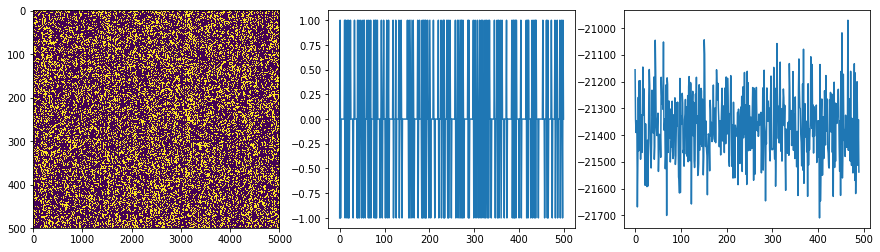

In [71]:
print(log_P_data(data, s))

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(np.array(ss), aspect="auto")

plt.subplot(132)
plt.plot(np.sum(ss - np.roll(ss, 1), axis=1))

plt.subplot(133)
plt.plot(p_data[10:])

In [72]:
" ".join(cut_words(data, s))[:2000]

'o ral ter native lyas opposing aut hor ity inth eco ndu ctof h uma nrelation spropon e nt sofa narchis m kno w n a sanar chistsa dvo c atestatele sssociet iesa s the onlymor alform ofs ocia lor g a nizati o ntherea r e man yty p esan d tr a dition s o f anar chismnotallo fwhich are mut ua lly exclu siveanarchi st s choo lsofth o u ght ca ndiff er fundam entallys upp orting anyt h i ngf r o m ex tre m eindi v iduali smt ocompl e tecol lecti vism a n ar ch ismiso ft enc onsid eredtobearadicall e ftwingid eol o gyan d muchofana r c hi s tecon o mic sandana rchistleg a lphi los ophyre flec tan tist atist interpr etat i o ns o fco mmu n is mc ol lectiv isms ynd ica lis m orpartici p atorye co nomi csho wev e ranar chis m hasa lwa y sinclude d a n i n divid u a listst rainsu pp or tin gamarke te conomy a ndpriva tep ropertyor mo r allyunre s t r ainede goism s omei ndivi du a l i s t anarchi stsarea lsosocia list sorc o mmunist swh ilesomea narch ocom munistsarea lso ind ividu ali sts or eg

In [73]:
count

Counter({'o': 28,
         'ral': 2,
         'tern': 1,
         'ati': 4,
         've': 1,
         'l': 26,
         'ya': 1,
         'soppo': 1,
         'si': 5,
         'ng': 3,
         'a': 58,
         'u': 13,
         'th': 2,
         'or': 1,
         'ityi': 1,
         'nt': 5,
         'h': 23,
         'ec': 5,
         'on': 3,
         'd': 16,
         'c': 18,
         't': 28,
         'fh': 2,
         'm': 22,
         'an': 1,
         'r': 15,
         'e': 38,
         'lati': 1,
         'sp': 3,
         'op': 3,
         'ne': 1,
         'n': 31,
         'tso': 1,
         'f': 18,
         'nar': 5,
         'chis': 5,
         'k': 6,
         'owna': 2,
         'sanarc': 1,
         'istsa': 1,
         'dvo': 1,
         'cate': 1,
         'stat': 1,
         'el': 2,
         'ess': 1,
         'so': 3,
         'ie': 4,
         'ti': 6,
         'es': 7,
         's': 22,
         'lymora': 1,
         'fo': 1,
         'rmofso': 1,
         